# **Heart disease prediction using**

# Project Objective
Heart Disease Prediction using Machine Learning
Heart disease prevention is critical, and data-driven prediction systems can significantly aid in early diagnosis and treatment. Machine Learning offers accurate prediction capabilities, enhancing healthcare outcomes.
In this project, I analyzed a heart disease dataset with appropriate preprocessing. Multiple classification algorithms were implemented in Python using Scikit-learn and Keras to predict the presence of heart disease.

**Algorithms Used**:
- Logistic Regression
- Naive Bayes
- Support Vector Machine (Linear)
- K-Nearest Neighbors
- Decision Tree
- Random Forest
- XGBoost
- Artificial Neural Network (1 Hidden Layer, Keras)

### Step - 1 import all modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 
import warnings
import IPython
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error

warnings.filterwarnings("ignore")


### Step-2 Load data

In [2]:
df= pd.read_csv(r"C:\Users\divya\OneDrive\Documents\GitHub\projet\heat-disease\heart.csv")

### Step-3 Understanding Data Using EDA

In [3]:
#3.1
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#3.2
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#3.3
df.shape

(303, 14)

In [6]:
#3.4
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#3.5 data column
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

#### 3.6 Column Desc
- **age**:			``age``
- **sex**:			``1: male, 0: female``
- **cp**:			``chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic``
- **trestbps**:			``resting blood pressure``
- **chol**:			`` serum cholestoral in mg/dl``
- **fbs**:			``fasting blood sugar > 120 mg/dl``
- **restecg**:			``resting electrocardiographic results (values 0,1,2)``
- **thalach**:			 ``maximum heart rate achieved``
- **exang**:			``exercise induced angina``
- **oldpeak**:			``oldpeak = ST depression induced by exercise relative to rest``
- **slope**:			``the slope of the peak exercise ST segment``
- **ca**:			``number of major vessels (0-3) colored by flourosopy``
- **thal**:			``thal: 3 = normal; 6 = fixed defect; 7 = reversable defect``

#### 3.7 Checking Null Value

In [8]:
df.isna().sum()
#no null values founded
#so we not have to remove, fill columns 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### 3.8 column description

In [9]:
df.describe()
#this will give the complete description about the column min, max, etc.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### 3.9 Each Column univariate analysis

In [10]:
#checking unique values in each columns
for i in df:
    print(f"column_{i}",df[i].unique())
    print('==================',end = '\n\n')

column_age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]

column_sex [1 0]

column_cp [3 2 1 0]

column_trestbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]

column_chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 3

#### 3.10 Each Numerical feature hist plot distrubtion

In [11]:
# r=5
# c=3
# plt.figure(figsize=(30,28))
# for i,j in enumerate(df):
#     plt.subplot(r,c,i+1)
#     plt.title(f"{j} distribution analysis",color="blue")
#     sns.histplot(df[j],kde=True,color="r")
#     plt.savefig("All numerical feature Analysis",dpi=400)

#### 3.11 Bivariate Analysis To check Correlation of featur vs target

In [12]:
# plt.figure(figsize=(15,10))
# sns.heatmap(df.corr().round(2),cmap="mako", annot=True)
# plt.show()

In [13]:
# "thalach" refers to the maximum heart rate achieved during exercise, specifically measured in beats per minute (bpm)
# Fasting blood sugar (FBS) levels, when elevated, can indicate an increased risk of heart disease
# "slope" usually refers to the ST/HR slope, which is a measurement derived from an exercise stress test used to assess the severity of coronary artery disease

#### 3.12 target vs feature

In [14]:
df.corr()['target'].sort_values(ascending = False).reset_index()

,index,target
0,target,1.000000
1,cp,0.433798
2,thalach,0.421741
3,slope,0.345877
4,restecg,0.137230
5,fbs,-0.028046
6,chol,-0.085239
7,trestbps,-0.144931
8,age,-0.225439
9,sex,-0.280937


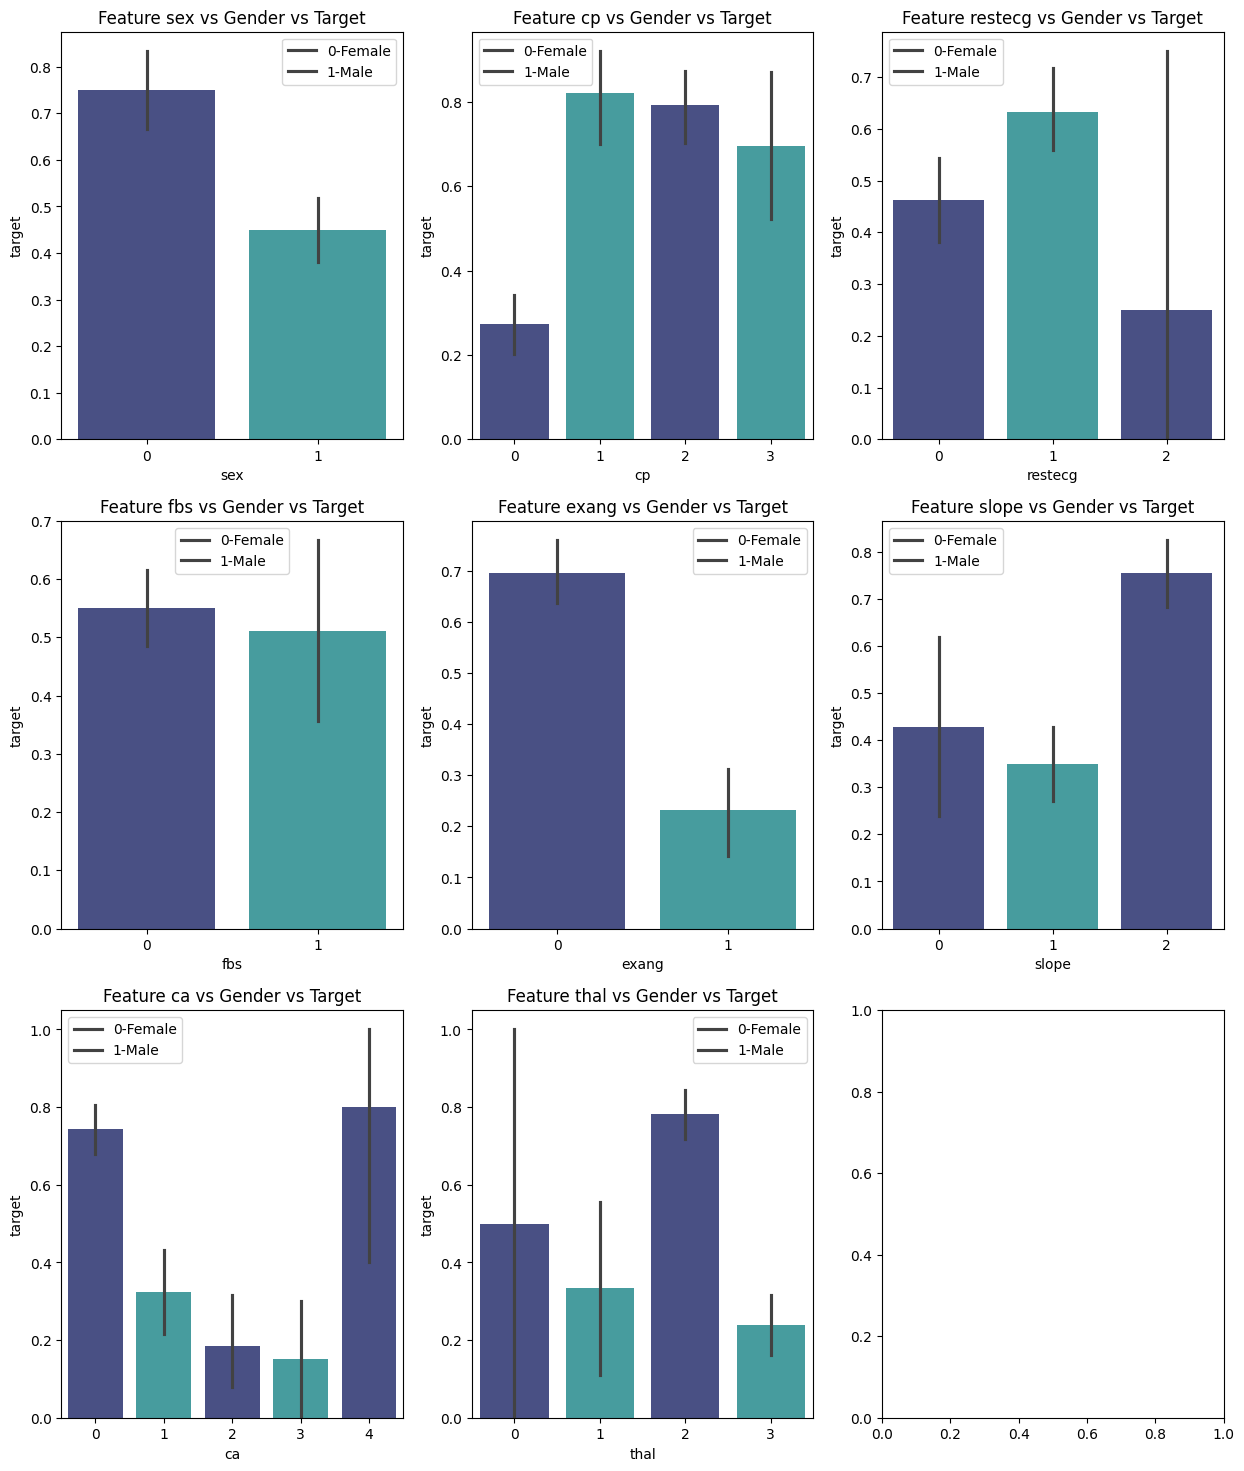

In [15]:
r = 3
c = 3
x_col = ['sex','cp','restecg','fbs','exang','slope', 'ca', 'thal']
plt.figure(figsize=(15,18))
for i in range(r*c):
    try:
        plt.subplot(r,c,i+1)
        plt.title(f'Feature {x_col[i]} vs Gender vs Target')
        sns.barplot(data = df, x = x_col[i], y = 'target', palette=sns.color_palette('mako',2))
        plt.legend(["0-Female","1-Male"])
    except:
        ...
plt.show()


#### 3.13 feature vs target compare

In [16]:
# sns.pairplot(data=df,corner=False,hue="target")
# plt.show()

## Step - 4 Divide data into testing and training

In [17]:
#4.1 Divide data into target and feature
X=df.iloc[:,:-1]
y=df["target"]

In [18]:
X.shape, y.shape

((303, 13), (303,))

In [19]:
#4.2 Train test split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42) #here we divide the data into 80% and 20%. 20% is for testing

In [20]:
print(X_train.shape,X_test.shape, y_train.shape,y_test.shape)

(242, 13) (61, 13) (242,) (61,)


## Step-5 Create Multi-Model 

In [21]:
#because target value is only have 1 and 0 so we use binary classification


#### 5.1 Logistic Regression Model

In [22]:
#here we used sigmoid 
#logistic Regression we can solve binary and multiclass regression
# y_pred = mx+c
# z=y_pred

In [23]:
#5.1.1 model creation
from sklearn.linear_model import LogisticRegression
model_lr= LogisticRegression()
model_lr.fit(X_train,y_train) #train the model 

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [24]:
y_pred=model_lr.predict(X_test)

In [25]:
#5.1.2 import model evalution metrics 
#it will call when the problem is classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

In [26]:
#5.1.3 import confusion matrix to evaluate classification model
from sklearn.metrics import confusion_matrix

In [27]:
#Error : Comparision  if score is tie
#type 1 and type2 error type 1 error is more danger 

In [28]:
cm=confusion_matrix(y_test,y_pred) #here we have 4 type 1 error and 3 type 2 error

Text(50.722222222222214, 0.5, 'Actuall value')

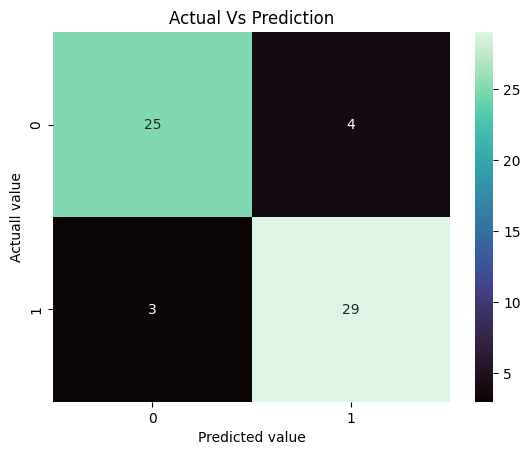

In [29]:
plt.title("Actual Vs Prediction")
sns.heatmap(cm,annot=True,cmap="mako")
plt.xlabel("Predicted value")
plt.ylabel("Actuall value")

In [30]:
cm.ravel()

array([25,  4,  3, 29])

In [31]:
TN,FP,FN,TP= cm.ravel()

In [32]:
ps=precision_score(y_test,y_pred)
print("precision score : ",ps)

precision score :  0.8787878787878788


In [33]:
accuracy_score(y_test,y_pred)

0.8852459016393442

In [34]:
rs=recall_score(y_test,y_pred)
print("Recall Score : ",rs)

Recall Score :  0.90625


In [35]:
f1=f1_score(y_test,y_pred)
print("F1 Score : ",f1)

F1 Score :  0.8923076923076924


In [36]:
#for calculating all score we can use classification score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [37]:
#5.1.4 checking model score
lr_score=model_lr.score(X_test,y_test) #model score and accuracy score are same
lr_score

0.8852459016393442

In [38]:
#with this our LogisticRegression model is end 

#### 5.2 Naive Bayes ML model

In [39]:
#This model pre assumption : It will pre assume No correlation b/w features
#This model is base on bayes theorem 

In [40]:
#5.2.1 import module
from sklearn.naive_bayes import GaussianNB 
#GaussianNB is used when we have binary classifiaaction
#MultinomialNB is used when we have multi class classification
#since we have binary classification so here we used GaussianNB 

In [41]:
model_nv=GaussianNB()
model_nv.fit(X_train,y_train)

,priors,None
,var_smoothing,1e-09


In [42]:
y_pred=model_nv.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [43]:
nv_score=model_nv.score(X_test,y_test)
print("Naive Bayes score : ",nv_score)

Naive Bayes score :  0.8688524590163934


In [44]:
print("Accuracy score : ",accuracy_score(y_test,y_pred))
print("Precision score : ",precision_score(y_test,y_pred))
print("Recall Score : ",recall_score(y_test,y_pred))
print("F1 Score : ",f1_score(y_test,y_pred))

Accuracy score :  0.8688524590163934
Precision score :  0.9
Recall Score :  0.84375
F1 Score :  0.8709677419354839


Text(50.722222222222214, 0.5, 'Actuall value')

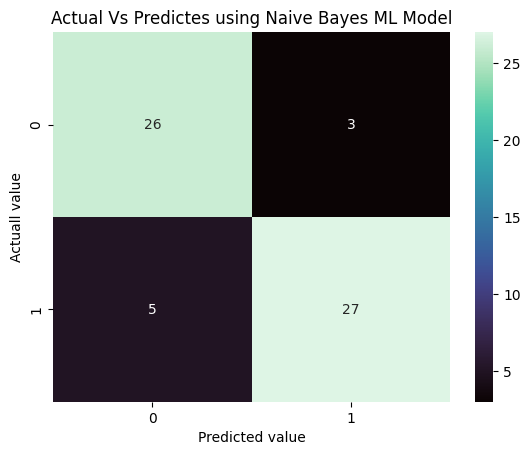

In [45]:
cm= confusion_matrix(y_test,y_pred)
plt.title("Actual Vs Predictes using Naive Bayes ML Model")
sns.heatmap(cm,annot=True,cmap="mako")
plt.xlabel("Predicted value")
plt.ylabel("Actuall value")

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### 5.3 Support Vector machine (SVM) Model

In [47]:
# SVM Works on Support vectos of nearest data points of different classes
# It will create line, plane or Hyperplane
# we can use this for both regression problems and classification(Binary/Multiclass)

#### 5.3.1 Import Module

In [48]:
from sklearn.svm import SVC

In [49]:
model_svc= SVC()
model_svc.fit(X_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [50]:
#5.3.2
y_pred=model_svc.predict(X_test)

#### 5.3.3 checking scores and confussion matrics

In [51]:
print("Accuracy score : ",accuracy_score(y_test,y_pred))
print("Precision score : ",precision_score(y_test,y_pred))
print("Recall Score : ",recall_score(y_test,y_pred))
print("F1 Score : ",f1_score(y_test,y_pred))

Accuracy score :  0.7049180327868853
Precision score :  0.6666666666666666
Recall Score :  0.875
F1 Score :  0.7567567567567568


In [52]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.69        61
weighted avg       0.73      0.70      0.69        61



Text(50.722222222222214, 0.5, 'Actuall value')

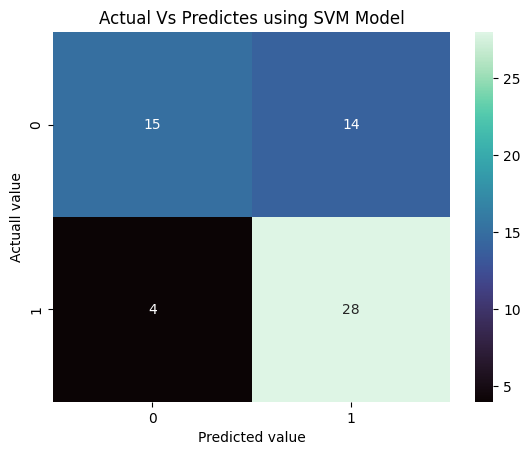

In [53]:
cm= confusion_matrix(y_test,y_pred)
plt.title("Actual Vs Predictes using SVM Model")
sns.heatmap(cm,annot=True,cmap="mako")
plt.xlabel("Predicted value")
plt.ylabel("Actuall value")

In [54]:
svc_score= accuracy_score(y_test,y_pred)

In [55]:
print(lr_score,nv_score,svc_score)

0.8852459016393442 0.8688524590163934 0.7049180327868853


### Step 5.4 decision tree ml model

![alt text](decision_tree_nodes.png)

### 5.4.1 import module

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
# 5.4.2 model creation
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [58]:
y_pred=model_dt.predict(X_test)

In [59]:
#5.4.2 checking score
print("Accuracy score : ",accuracy_score(y_test,y_pred))
print("Precision score : ",precision_score(y_test,y_pred))
print("Recall Score : ",recall_score(y_test,y_pred))
print("F1 Score : ",f1_score(y_test,y_pred))

Accuracy score :  0.819672131147541
Precision score :  0.92
Recall Score :  0.71875
F1 Score :  0.8070175438596491


In [60]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83        29
           1       0.92      0.72      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61



Text(50.722222222222214, 0.5, 'Actuall value')

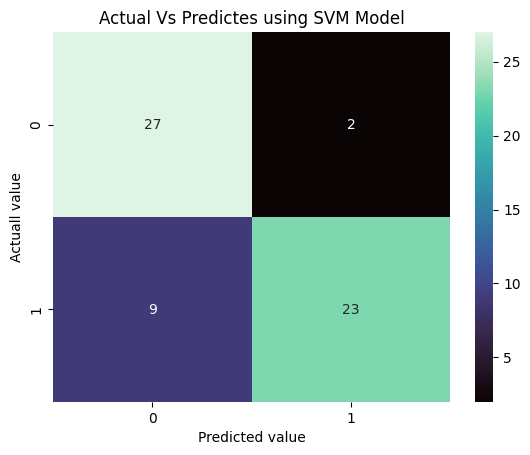

In [61]:
cm= confusion_matrix(y_test,y_pred)
plt.title("Actual Vs Predictes using SVM Model")
sns.heatmap(cm,annot=True,cmap="mako")
plt.xlabel("Predicted value")
plt.ylabel("Actuall value")

In [62]:
dt_score=model_dt.score(X_test,y_test)
dt_score

0.819672131147541

In [63]:
from sklearn.tree import plot_tree

In [64]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

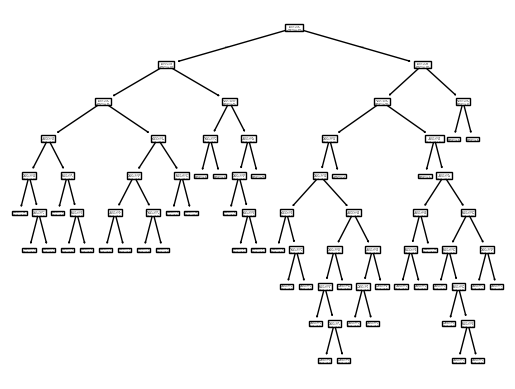

In [65]:
plot_tree(model_dt)
plt.show

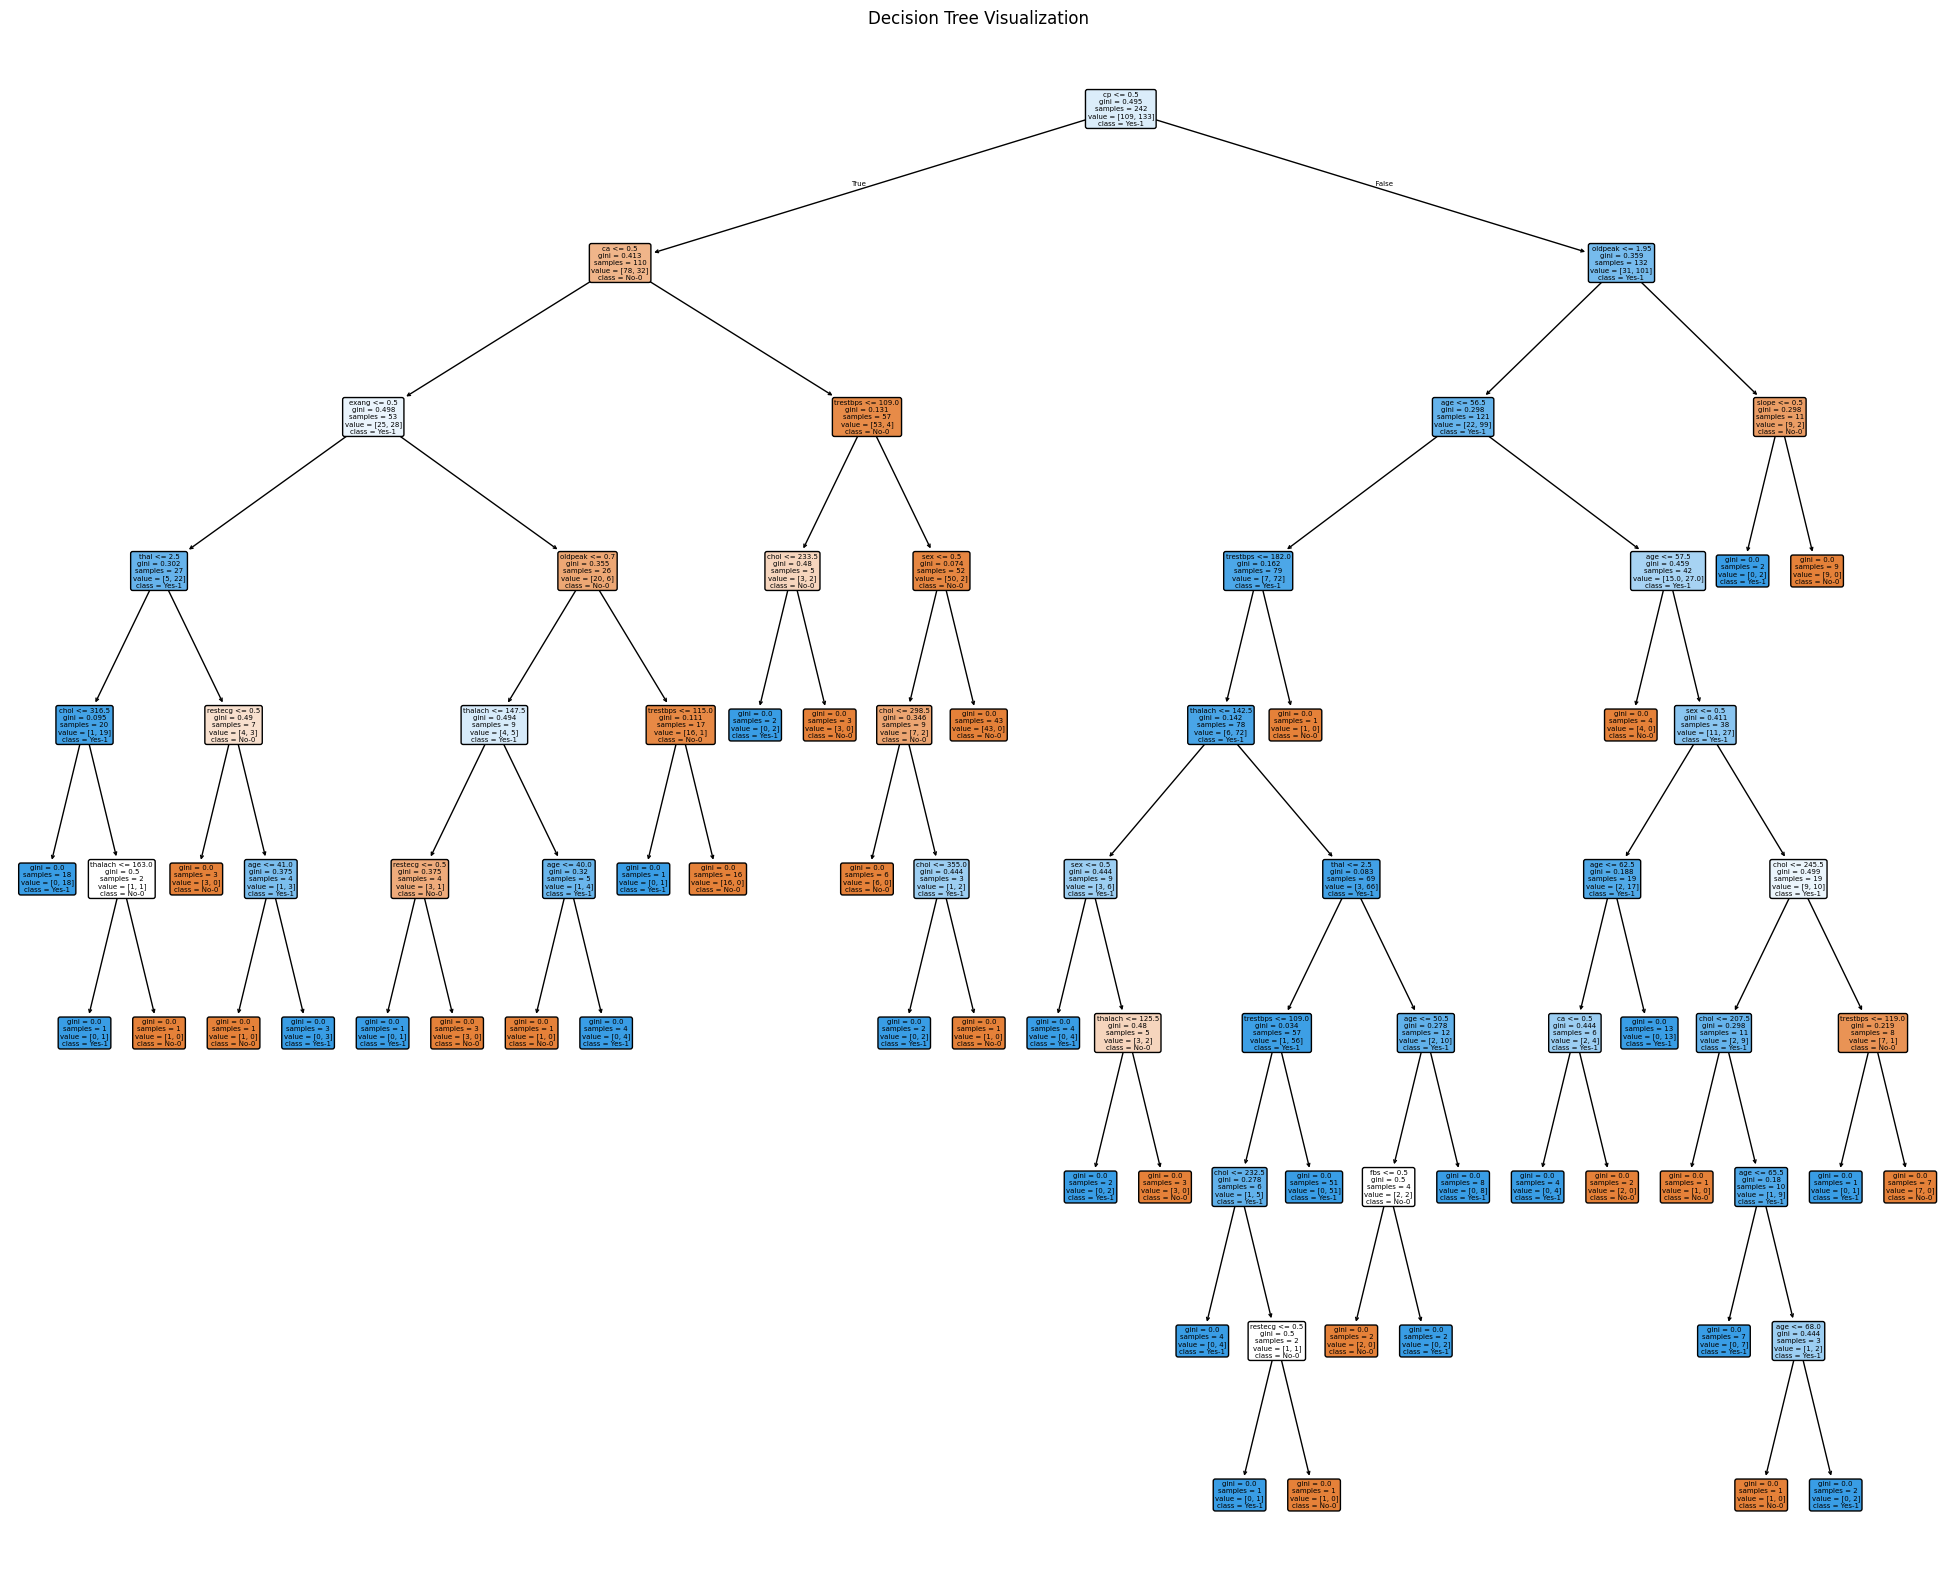

In [66]:
plt.figure(figsize=(25, 20)) # Adjust figure size for better readability
plot_tree(model_dt,
          feature_names=X.columns,
          class_names=['No-0','Yes-1'],
          filled=True, # Color nodes based on class
          rounded=True, # Round node corners
          fontsize=5) # Adjust font size

plt.title("Decision Tree Visualization")
plt.show() # Display the plot

### Step 5.5 Enssemble ML Model
Enssemble mean tech with same models with multiple parameters
- Bagging Techinique
- Boosting Techinque

![alt text](1_zTgGBTQIMlASWm5QuS2UpA.jpg)

##### Bagging techinque - here we create multiple bags of ML Model and each Model give prediction. and the final result choose by voting
##### Boosting Techinique - next model learn from previous model and boost it's prefivation score

##### 5.5.1 Bagging Techinque >> Random forest ML Model

In [67]:
#Random Forest is the advanced version of Decision tree Model
#By default one random forest have 100 trees
#if random forest is a regression problem then it give the average value of the tree result 
# Random forest classification work with both binary and multiclass classification and give majority result
# there is no gurantee that it give the best result than decission tree. decision tree also sometime give the best result

##### 5.5.2 import module

In [68]:
from sklearn.ensemble import RandomForestClassifier


In [69]:
model_rf= RandomForestClassifier()
model_rf.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [70]:
#5.5.3
y_pred=model_rf.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [71]:
#### Score
print("Accuracy score : ",accuracy_score(y_test,y_pred))
print("Precision score : ",precision_score(y_test,y_pred))
print("Recall Score : ",recall_score(y_test,y_pred))
print("F1 Score : ",f1_score(y_test,y_pred))

Accuracy score :  0.8032786885245902
Precision score :  0.8333333333333334
Recall Score :  0.78125
F1 Score :  0.8064516129032258


In [72]:
rf_score=model_rf.score(X_test,y_test)

Text(50.722222222222214, 0.5, 'Actuall value')

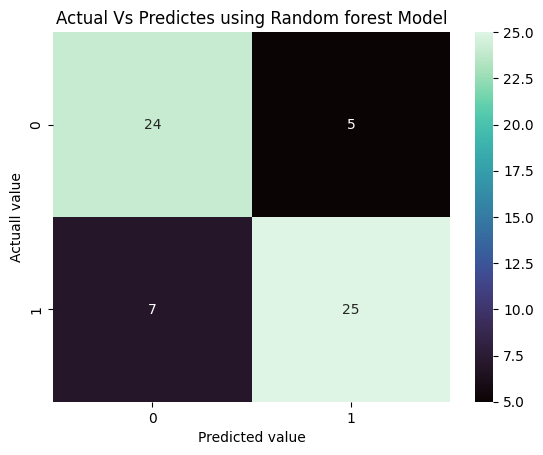

In [73]:
#5.5.4
cm= confusion_matrix(y_test,y_pred)
plt.title("Actual Vs Predictes using Random forest Model")
sns.heatmap(cm,annot=True,cmap="mako")
plt.xlabel("Predicted value")
plt.ylabel("Actuall value")

#### Step 5.5.5 Boosting Techinque - Addaboost, Gradient Boost, Xgboost

In [74]:
# Adaboost - adaptive boosting
# Gradient - GBM
# LBM Gradient - LGBM
# XGBoosting - Extreme Gradient Boosting --> This minimize the error but increase the 

![alt text](1-s2.0-S1568494623000844-gr6.jpg)

In [75]:
# 5.5.2 installing module
from xgboost import XGBClassifier

In [76]:
model_xgb=XGBClassifier()
model_xgb.fit(X_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [77]:
y_pred=model_xgb.predict(X_test)

In [78]:
xgb_score=model_xgb.score(X_test,y_test)
xgb_score

0.819672131147541

### 5.7 KNN --> k Neareast Neighbors

In [79]:
# knn work on distance and it work for both regression and classification

![alt text](0_TvcdzOWZyBoZZ-wJ.png)

![alt text](<61caab2472ef2fac037736b1_eulidean distance-min.png>)

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
model_knn=KNeighborsClassifier(n_neighbors=10)
model_knn.fit(X_train,y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [82]:
y_pred=model_knn.predict(X_test)

In [83]:
knn_Score=model_knn.score(X_test,y_test)
knn_Score

0.7049180327868853

Text(50.722222222222214, 0.5, 'Actuall value')

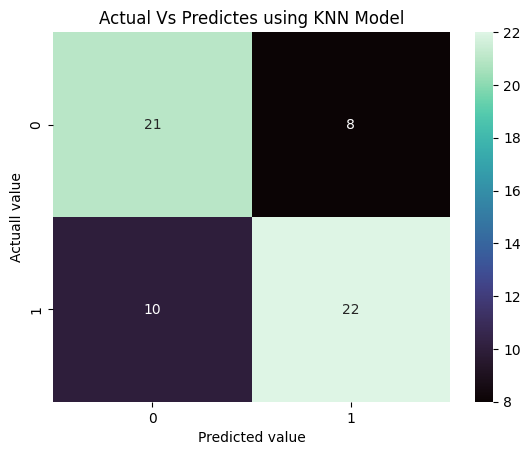

In [84]:
cm= confusion_matrix(y_test,y_pred)
plt.title("Actual Vs Predictes using KNN Model")
sns.heatmap(cm,annot=True,cmap="mako")
plt.xlabel("Predicted value")
plt.ylabel("Actuall value")

### 5.8 Artificial Neural Network Using deeplearning

In [85]:
#problem with ml. Why we need deeplearning
    #ML Work on limted Data 
    # If the input change then ML Model fail

# Deep learning - dense(Deep) Neural Network Trained on multiple possibilites

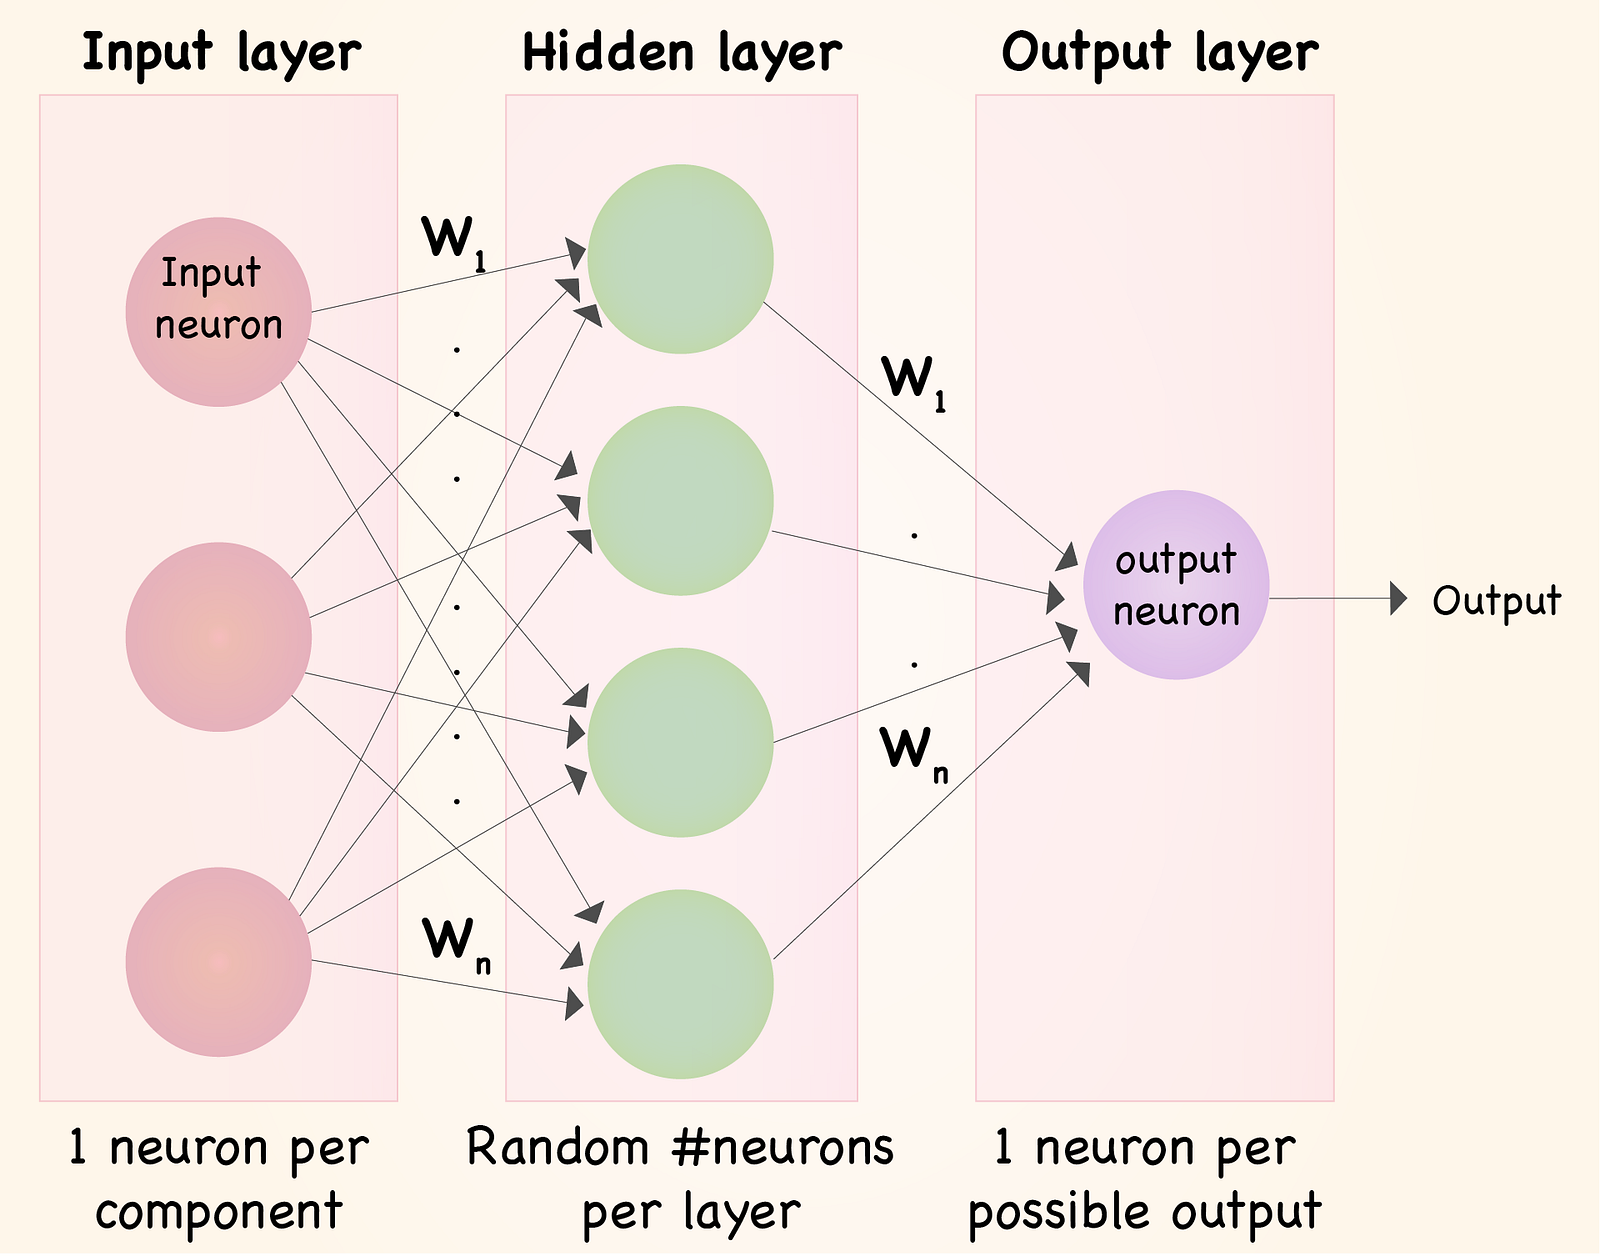

![alt text](94912bosem.png)

![alt text](1688885174323.jpg)

In [86]:
# 5.8.1 Module Creation
from keras.models import Sequential
from keras.layers import Dense

In [87]:
model= Sequential()
model.add(Dense(11,activation="relu",input_dim=13))
model.add(Dense(1,activation="sigmoid")) #output Will be 1 neuron for binary 
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

In [88]:
#5.8.3 model training 
model.fit(X_train,y_train,epochs=300) #epochs mean how many time it train

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5496 - loss: 44.4434  
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5496 - loss: 40.9338 
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5496 - loss: 37.6629 
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5496 - loss: 34.5196 
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5496 - loss: 31.5690 
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5496 - loss: 28.6844 
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5496 - loss: 25.9887 
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5496 - loss: 23.1435 
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5496 - loss: 20.6087 
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5496 - loss: 18.0878 
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5496 - loss: 15.5080 
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 

In [89]:
y_pred=model.predict(X_test)
# y_pred=[for i in y_pred if i>0.5]
y_pred=[round(i[0]) for i in y_pred]
y_pred

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


[0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0]

In [90]:
ann_score= accuracy_score(y_pred,y_test)
ann_score

0.8688524590163934

In [91]:
lr_score

0.8852459016393442

### Step 6 Score Compare

In [92]:
all_model_score  = [lr_score,nv_score,svc_score,dt_score,rf_score,xgb_score,knn_Score,ann_score]
model_name = ['Logistic','Naive','SVM','Decision Tree','Random Forest','XGB','Knn','ANN']

print('Done')

Done


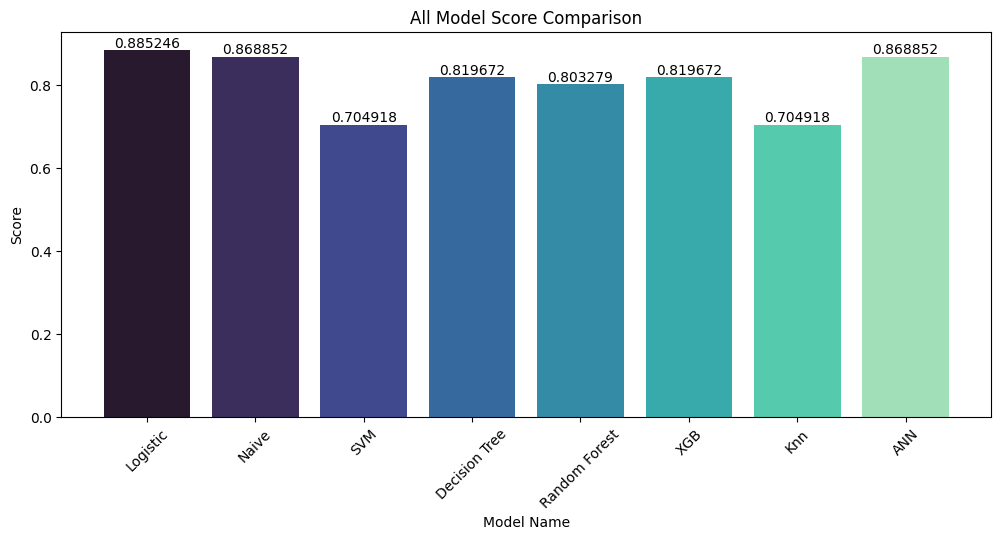

In [93]:
plt.figure(figsize=(12,5))
plt.title('All Model Score Comparison')
ax = plt.bar(x = model_name, height= all_model_score,color = sns.color_palette('mako',8))
plt.bar_label(ax)
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.xticks(rotation = 45)
plt.show()

### Step 7 Save best model

In [94]:
#since our lr model give heighest score so we save lr

In [95]:
import pickle

In [96]:
with open("Heart_disease_pred.pkl",'wb') as f:
    pickle.dump(model_lr,f)